**Jupyter: w_ipa**

This is an example jupyter/ipython notebook for WESTPA simulations, designed for interactive analysis using w_ipa.  Use this as a template for further browser-based interactive analysis of simulations.

You'll want to start each notebook session with the following:

```
    import w_ipython
    w = w_ipython.WIPI()
    w.main()
```

The w object can then be used for analysis.  Schemes can be listed and changed with

```
    w.list_schemes
    w.scheme = SCHEME_NUMBER/NAME
```

Run help(w), or w.introduction for more details.

Happy analyzing!

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.inf)
import w_ipa
w = w_ipa.WIPI()
# At startup, it will load or run the analysis schemes specified in the configuration file (typically west.cfg)
w.main()
w.interface = 'matplotlib'


Welcome to w_ipa (WESTPA Interactive Python Analysis) v. 1.0B!
Run w.introduction for a more thorough introduction, or w.help to see a list of options.
Running analysis & loading files.

Complete!
Setting iteration to iter 200.


In [2]:
total_iteration = w.niters

it = [0.0 for i in range(total_iteration)]
itex = 10 #number of iterations to be excluded due to harmonic constrain

flux = 0.0
flux_array = []
sink = 26.0

lifetime = 0.0
force_eval = 0.0

count_forward = 0
count_backward = 0
for i in range(total_iteration-itex):
    w.iteration = i+1+itex
    l = w.current.pcoord
    wts = w.current.weights
    tau = 11
    force_eval += (tau-1)*w.current.walkers*0.2
    print 'total simulation time = ', force_eval, 'ps'
    for j in range(len(l)):
        #print j
            
        if l[j][0] > sink and l[j][tau-1] <= sink:
            it[i] += wts[j]
            #print wts[j]
            count_backward += 1
            for k in range(tau):
                #print k
                if l[j][k] > sink and l[j][k+1] <= sink:
                    flux += wts[j]
                    lifetime += wts[j]*(i*(tau-1)+k)
                    break
            #break
    print flux
    flux_array.append(flux)
flux = flux/((total_iteration-itex)*(tau-1))    
print "MFPT = ", 1./flux     
print "lifetime = ", lifetime/sum(it)
print sum(it)
print sum(it)/flux

f1 = open('milestone-data.dat','w')
print >>f1, "#MFPT  #MFPT_back  #lifetime  #forward probability  #backward probability #forward count #backward count"
print >>f1, 0.0, 1./flux, lifetime, 0.0, sum(it), count_forward, count_backward
f1.close()

Setting iteration to iter 11.
total simulation time =  20.0 ps
0.0
Setting iteration to iter 12.
total simulation time =  40.0 ps
0.0
Setting iteration to iter 13.
total simulation time =  70.0 ps
0.0177777777778
Setting iteration to iter 14.
total simulation time =  120.0 ps
0.0213333333333
Setting iteration to iter 15.
total simulation time =  180.0 ps
0.0259351851852
Setting iteration to iter 16.
total simulation time =  230.0 ps
0.0398734567901
Setting iteration to iter 17.
total simulation time =  290.0 ps
0.0694734567901
Setting iteration to iter 18.
total simulation time =  350.0 ps
0.126932716049
Setting iteration to iter 19.
total simulation time =  410.0 ps
0.167221604938
Setting iteration to iter 20.
total simulation time =  470.0 ps
0.189085216049
Setting iteration to iter 21.
total simulation time =  530.0 ps
0.194795709877
Setting iteration to iter 22.
total simulation time =  590.0 ps
0.200360246914
Setting iteration to iter 23.
total simulation time =  650.0 ps
0.204713

total simulation time =  6240.0 ps
0.41993569721
Setting iteration to iter 121.
total simulation time =  6300.0 ps
0.458157053066
Setting iteration to iter 122.
total simulation time =  6350.0 ps
0.458157053066
Setting iteration to iter 123.
total simulation time =  6410.0 ps
0.461215751481
Setting iteration to iter 124.
total simulation time =  6470.0 ps
0.472940762071
Setting iteration to iter 125.
total simulation time =  6520.0 ps
0.485858217527
Setting iteration to iter 126.
total simulation time =  6580.0 ps
0.487081696892
Setting iteration to iter 127.
total simulation time =  6640.0 ps
0.487294106505
Setting iteration to iter 128.
total simulation time =  6700.0 ps
0.488509089486
Setting iteration to iter 129.
total simulation time =  6760.0 ps
0.48891974807
Setting iteration to iter 130.
total simulation time =  6820.0 ps
0.488967894248
Setting iteration to iter 131.
total simulation time =  6880.0 ps
0.489006127979
Setting iteration to iter 132.
total simulation time =  6940.

In [3]:
print it
f1 = open('FPTD.dat','w')

for i in range(itex,total_iteration):
    print >>f1, i*(tau-1), it[i]
    
f1.close()

[0.0, 0.0, 0.017777777777777778, 0.0035555555555555557, 0.0046018518518518518, 0.013938271604938272, 0.029599999999999998, 0.057459259259259259, 0.040288888888888881, 0.021863611111111108, 0.0057104938271604934, 0.0055645370370370362, 0.0043529769547325098, 0.0029019846364883397, 0.0037564728669410145, 0.0, 0.00038693128486511199, 0.0, 0.0, 2.8374960890108214e-05, 5.4385341706040743e-05, 0.0, 2.7126988073182159e-05, 3.152773432234246e-06, 2.3317386842565779e-06, 2.1292167797554194e-06, 2.8736216179218392e-07, 3.831495490562452e-08, 4.8736622639954382e-07, 1.5900706285834177e-07, 2.8851161043935265e-08, 2.3946846816015325e-08, 3.3755475271855201e-08, 2.3946846816015325e-09, 6.3858258176040867e-09, 1.7960135112011494e-09, 1.3303803786675181e-10, 1.5964564544010217e-10, 5.5388169765190998e-10, 1.4634184165342699e-10, 9.5787387264061303e-11, 4.39025524960281e-11, 5.0850094473514023e-11, 2.4722902036904709e-11, 5.6356391040776812e-12, 3.9357086202247413e-12, 1.3858128944453315e-12, 1.626020

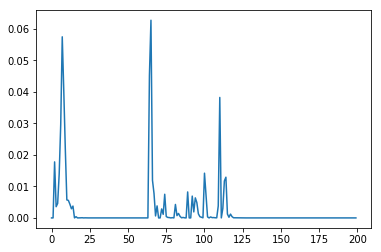

In [4]:
plt.plot(it)

190 200


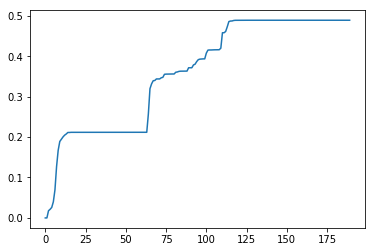

In [10]:
plt.plot(flux_array)
print len(flux_array), total_iteration
f1 = open('flux.dat','w')
print >>f1, '#time #flux_forward #flux_backward'

for i in range(total_iteration-itex):
    print >>f1, i*(tau-1), flux_array[i]

f1.close()